### Завдання 1
* Використовуючи датасет з файлу **Position_Salaries.csv**, побудуйте модель поліноміальної регресії.

In [132]:
import pandas as pd


# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [133]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# Divide dataset into two camponents.
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fitting Linear Regression to the dataset
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
print('Linear Regression has been fitted')


Linear Regression has been fitted


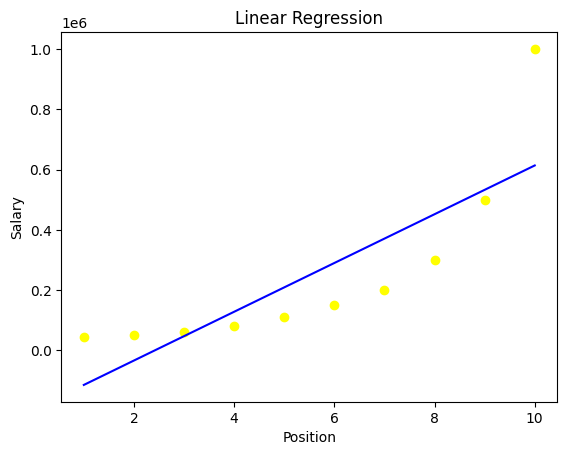

In [134]:
import matplotlib.pyplot as plt

# Visualizing the Linear Regression.
plt.scatter(X, y, color='yellow')
plt.plot(X, y_pred, color='blue')
plt.title('Linear Regression')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()


In [135]:
print('Score:', model.score(X, y))


Score: 0.6690412331929895


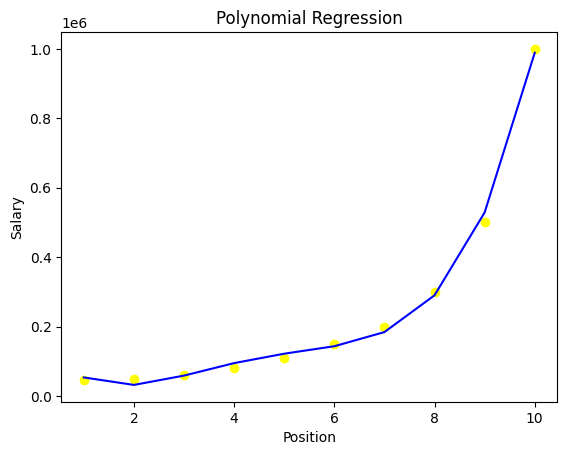

In [136]:
from sklearn.preprocessing import PolynomialFeatures

# Fitting Polynomial Regression to the dataset.
polynom_regression = PolynomialFeatures(degree=4)
X_poly = polynom_regression.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)
y_poly_pred = model.predict(X_poly)

# Visualizing the Polynomial Regression.
plt.scatter(X, y, color='yellow')
plt.plot(X, y_poly_pred, color='blue')
plt.title('Polynomial Regression')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()


### Завдання 2
* Використовуючи датасет з файлу **communities.csv**, виконайте нормалізацію даних.
* Визначте найкращий метод для цього набору даних.

In [156]:
from numpy import genfromtxt


# Importing the dataset
dataset = genfromtxt('communities.csv', delimiter=',', dtype='int64') # dtype='int64' - convert missing values to int.
#dataset = pd.read_csv('communities.csv')
dataset


array([[    8,    -1,    -1, ...,    -1,    -1,    -1],
       [   53,    -1,    -1, ...,     0,    -1,    -1],
       [   24,    -1,    -1, ...,     0,    -1,    -1],
       ...,
       [    9,     9, 80070, ...,    -1,    -1,    -1],
       [   25,    17, 72600, ...,    -1,    -1,    -1],
       [    6,    -1,    -1, ...,     1,    -1,    -1]], dtype=int64)

In [140]:
from sklearn.model_selection import train_test_split


# Divide dataset into two camponents.
X = dataset[:, :-1]
y = dataset[:, -1]

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.25, random_state=0)
print('Dataset has been splitted')


Dataset has been splitted


### Linear Regression Training and Test:

In [141]:
from sklearn.linear_model import LinearRegression


linear_reg = LinearRegression().fit(X_train_1, y_train_1)
linear_reg.fit(X, y)

print(f'Linear Regression Training set score: {linear_reg.score(X_train_1, y_train_1):.2f}')
print(f'Linear Regression Test set score: {linear_reg.score(X_test_1, y_test_1):.2f}')


Linear Regression Training set score: 0.21
Linear Regression Test set score: 0.37


### L2 – Ridge Regression Training and Test:

In [154]:
from sklearn.linear_model import Ridge


ridge = Ridge(alpha=0.7).fit(X_train, y_train)
print(f'Ridge Regression Training set score: {ridge.score(X_train, y_train):.2f}')
print(f'Ridge Regression Test set score: {ridge.score(X_test, y_test):.2f}')


Ridge Regression Training set score: 0.62
Ridge Regression Test set score: 0.98


### L1 – Lasso Regression Training and Test:

In [151]:
from sklearn.linear_model import Lasso


lasso = Lasso(alpha=0.8).fit(X_train, y_train)
print(f'Lasso Regression Training set score: {lasso.score(X_train, y_train):.2f}')
print(f'Lasso Regression Test set score: {lasso.score(X_test, y_test):.2f}')
print(f'Number of features: {sum(lasso.coef_ != 0)}')


Lasso Regression Training set score: 0.62
Lasso Regression Test set score: 0.98
Number of features: 1


### ElasticNet Regression Training and Test:

In [148]:
from sklearn.linear_model import ElasticNet


elastic_net = ElasticNet(alpha=0.7, l1_ratio=0.01).fit(X_train, y_train)
print(f'Elastic Net Training set score: {elastic_net.score(X_train, y_train):.2f}')
print(f'Elastic Net Test set score: {elastic_net.score(X_test, y_test):.2f}')


Elastic Net Training set score: 0.62
Elastic Net Test set score: 1.00
